Baseado no que foi coletado pelo sistema de web scraping usa-se as informações para conseguir criar um sistema de recomendação livros!
(Criar uma máquina preditiva por filtragem baseada em colaboração)

In [72]:
import math
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('repositorio.csv', encoding = 'utf-8', delimiter = ';')
df

,category,rating,title,price,stock
0,Travel,Two,It's Only the Himalayas,£45.17,In stock
1,Travel,Four,Full Moon over Noah’s Ark: An Odyssey to Mount...,£49.43,In stock
2,Travel,Three,See America: A Celebration of Our National Par...,£48.87,In stock
3,Travel,Two,Vagabonding: An Uncommon Guide to the Art of L...,£36.94,In stock
4,Travel,Three,Under the Tuscan Sun,£37.33,In stock
...,...,...,...,...,...
995,Politics,Four,Why the Right Went Wrong: Conservatism--From G...,£52.65,In stock
996,Politics,One,Equal Is Unfair: America's Misguided Fight Aga...,£56.86,In stock
997,Cultural,One,Amid the Chaos,£36.58,In stock
998,Erotica,Five,Dark Notes,£19.19,In stock


## Tratamento dos dados

In [41]:
# Atribuinndo valores numéricos as notas
rating = {'One':1, 'Two':2, 'Three':3,'Four':4,'Five':5}
numerical_rating = []
for rate in df.rating.values:
    numerical_rating.append(rating[rate])

In [42]:
# Atribuino
df['numerical_rating'] = numerical_rating

In [43]:
df

,category,rating,title,price,stock,numerical_rating
0,Travel,Two,It's Only the Himalayas,£45.17,In stock,2
1,Travel,Four,Full Moon over Noah’s Ark: An Odyssey to Mount...,£49.43,In stock,4
2,Travel,Three,See America: A Celebration of Our National Par...,£48.87,In stock,3
3,Travel,Two,Vagabonding: An Uncommon Guide to the Art of L...,£36.94,In stock,2
4,Travel,Three,Under the Tuscan Sun,£37.33,In stock,3
...,...,...,...,...,...,...
995,Politics,Four,Why the Right Went Wrong: Conservatism--From G...,£52.65,In stock,4
996,Politics,One,Equal Is Unfair: America's Misguided Fight Aga...,£56.86,In stock,1
997,Cultural,One,Amid the Chaos,£36.58,In stock,1
998,Erotica,Five,Dark Notes,£19.19,In stock,5


### No caso queremos criar uma modelo de recomendação de sistema baseado em conteúdo e gênero do livro, então será bom atribuir valores as categorias para que o modelo possa predizer os livros com base nesse dois valores.

In [74]:
# Atribuindo valores para categorias
dict_category = {}
for value in range(len(df.category.unique())):
    dict_category[df.category.unique()[value]] = value +1 

### Análise exploratória de dados

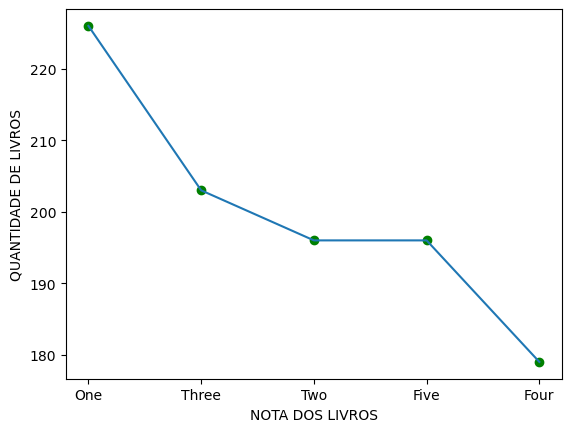

In [107]:
plt.scatter(x = df.rating.value_counts().index,y = df.rating.value_counts().values,color = 'green')
plt.plot(df.rating.value_counts())
plt.xlabel('NOTA DOS LIVROS')
plt.ylabel('QUANTIDADE DE LIVROS')
plt.show()

## Construindo sistema de recomendação baseado em itens mais populares

### A ideia para construção do sistema é pegar amostras aleatórias de livros de mesma categoria e a partir disso  recomendar livros baseado nos conteúdos dos usuários por categorias baseado na melhor nota(nesse caso é o melhor que podemos fazer, já que não se tem uma base de título lidos por usuários)

In [71]:
# Para construir o sistema basta seguir os seguintes passos
# 1) Tome a categoria que o usuário tem como base ou já leu
categoria_usuario = 'Default'
# 2) busque a categoria e veja qual sugestão existente para ele dos melhores aos piores livros
sugestoes = df[df['category']==categoria_usuario]
livros_notas_crescentes = suggestions.sort_values(by= 'numerical_rating').title
# 3) puxe por exemplo os 5 primeiros livros(se houver) com maior nota na categoria
titulos_sugeridos = sorted(list(livros_notas_crescentes), reverse = True)
# 4) mostrando os resultados mais bem avaliados
titulos_sugeridos[0:5]

['Zero History (Blue Ant #3)',
 'World War Z: An Oral History of the Zombie War',
 'Wildlife of New York: A Five-Borough Coloring Book',
 'Wild: From Lost to Found on the Pacific Crest Trail',
 "Where'd You Go, Bernadette"]

### Para tornar o sistema mais complexo uma boa ideia armazenar informações sobre o usuário caso ele leia sinopse do livro e não queira o livros sugerido, podemos armazer em um vetor de informações que o usuário não gostou e assim ir sugerindo as próximas o que está mais a baixo no ranking

In [127]:
# Suponhas então que o usuário tenha clicado em não gostar no item 3 por exemplo
# Então o ideial seria armazenar isso para o usuário em um vetor de não gostei
# Pode-se por exemplo ter o id do livro ou um numero que o identifique desse modo pode ser melhor e computacionalmente
# mais eficiente na hora de analisar o que está no vetor de deslikes
deslikes = []
indice_gostos = []
# 1) Para construir a solução é necessário pegar uma medida identificação supondo que bastanta enumerarmos o vetor temos
possiveis_gostos = list(enumerate(titulos_sugeridos))
# 2) Então se o usuário não quer o 3 chamamos a função adiciona elemento em deslikes
deslikes.append(3)
# 3) Agora como temos 3 adicionado no que ele não deve ter gostado puxarmos o vetor
contador = 0
for i in range(len(titulos_sugeridos)):
    if contador==5:
        break
    if i not in deslikes:
        contador+=1
        indice_gostos.append(i)
for contador in indice_gostos:
    print(titulos_sugeridos[contador])

Zero History (Blue Ant #3)
World War Z: An Oral History of the Zombie War
Wildlife of New York: A Five-Borough Coloring Book
Where'd You Go, Bernadette
What If?: Serious Scientific Answers to Absurd Hypothetical Questions


In [128]:
print(indice_gostos)

[0, 1, 2, 4, 5]


### Sistema baseado em conteúdos

In [9]:
users_interests = [
["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
["R", "Python", "statistics", "regression", "probability"],
["machine learning", "regression", "decision trees", "libsvm"],
["Python", "R", "Java", "C++", "Haskell", "programming languages"],
["statistics", "probability", "mathematics", "theory"],
["machine learning", "scikit-learn", "Mahout", "neural networks"],
["neural networks", "deep learning", "Big Data", "artificial intelligence"],
["Hadoop", "Java", "MapReduce", "Big Data"],
["statistics", "R", "statsmodels"],
["C++", "deep learning", "artificial intelligence", "probability"],
["pandas", "R", "Python"],
["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
["libsvm", "regression", "support vector machines"]
]

In [10]:
unique_interests = sorted(list({ interest
for user_interests in users_interests
for interest in user_interests }))

In [11]:
list(enumerate(unique_interests))

[(0, 'Big Data'),
 (1, 'C++'),
 (2, 'Cassandra'),
 (3, 'HBase'),
 (4, 'Hadoop'),
 (5, 'Haskell'),
 (6, 'Java'),
 (7, 'Mahout'),
 (8, 'MapReduce'),
 (9, 'MongoDB'),
 (10, 'MySQL'),
 (11, 'NoSQL'),
 (12, 'Postgres'),
 (13, 'Python'),
 (14, 'R'),
 (15, 'Spark'),
 (16, 'Storm'),
 (17, 'artificial intelligence'),
 (18, 'databases'),
 (19, 'decision trees'),
 (20, 'deep learning'),
 (21, 'libsvm'),
 (22, 'machine learning'),
 (23, 'mathematics'),
 (24, 'neural networks'),
 (25, 'numpy'),
 (26, 'pandas'),
 (27, 'probability'),
 (28, 'programming languages'),
 (29, 'regression'),
 (30, 'scikit-learn'),
 (31, 'scipy'),
 (32, 'statistics'),
 (33, 'statsmodels'),
 (34, 'support vector machines'),
 (35, 'theory')]

In [74]:
#Similiaridade de cosseno
def cosine_similarity(v, w):
    return np.dot(v, w) / math.sqrt(np.dot(v, v) * np.dot(w, w))

In [13]:
#dada uma lista de interesses, produza um vetor cujo i-ésimo elemento é 1 se unique_interests[i] está na lista, senão 0
def make_user_interest_vector(user_interests):
    return [1 if interest in user_interests else 0 for interest in unique_interests]
user_interest_matrix = list(map(make_user_interest_vector, users_interests))

In [63]:
for i in user_interest_matrix:
    print(i)

[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 0, 

In [75]:
# Processo de transposição
interest_user_matrix = [[user_interest_vector[j] for user_interest_vector in user_interest_matrix]
                        for j, _ in enumerate(unique_interests)]

In [79]:
interest_user_matrix[0]

[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]

In [77]:
interest_similarities = [[cosine_similarity(user_vector_i, user_vector_j)
for user_vector_j in interest_user_matrix]
for user_vector_i in interest_user_matrix]

In [113]:
def most_similar_interests_to(interest_id):
    similarities = interest_similarities[interest_id]
    pairs = [(similarity,unique_interests[other_interest_id])
    for other_interest_id, similarity in enumerate(similarities)
    if interest_id != other_interest_id and similarity > 0]
    return sorted(pairs,reverse=True)

In [114]:
similaridade = most_similar_interests_to(0)
similaridade

[(0.8164965809277261, 'Hadoop'),
 (0.6666666666666666, 'Java'),
 (0.5773502691896258, 'Storm'),
 (0.5773502691896258, 'Spark'),
 (0.5773502691896258, 'MapReduce'),
 (0.4082482904638631, 'neural networks'),
 (0.4082482904638631, 'deep learning'),
 (0.4082482904638631, 'artificial intelligence'),
 (0.4082482904638631, 'Cassandra'),
 (0.3333333333333333, 'HBase')]

In [122]:
from collections import defaultdict
def item_based_suggestions(user_id, include_current_interests=False):
    # soma interesses similares
    suggestions = defaultdict(float)
    user_interest_vector = user_interest_matrix[user_id]
    for interest_id, is_interested in enumerate(user_interest_vector):
        if is_interested == 1:
            similar_interests = most_similar_interests_to(interest_id)
            for similarity, interest in similar_interests:
                suggestions[interest] += similarity
    # ordena por peso
    suggestions = sorted(suggestions.items(),reverse=True)
    print(suggestions)
    if include_current_interests:
        return suggestions
    else:
        return [(suggestion, weight) for suggestion, weight in suggestions if suggestion not in users_interests[user_id]]

In [123]:
item_based_suggestions(0)

[('programming languages', 0.5773502691896258), ('neural networks', 0.4082482904638631), ('deep learning', 0.4082482904638631), ('databases', 0.5773502691896258), ('artificial intelligence', 0.4082482904638631), ('Storm', 4.146264369941973), ('Spark', 4.146264369941973), ('R', 0.2886751345948129), ('Python', 0.2886751345948129), ('Postgres', 1.3164965809277263), ('NoSQL', 1.2844570503761732), ('MySQL', 0.5773502691896258), ('MongoDB', 1.3164965809277263), ('MapReduce', 1.861807319565799), ('Java', 3.3794454097708404), ('Haskell', 0.5773502691896258), ('Hadoop', 3.9554550146924106), ('HBase', 3.0461120764375074), ('Cassandra', 3.547206724228547), ('C++', 0.4082482904638631), ('Big Data', 3.3794454097708404)]


[('programming languages', 0.5773502691896258),
 ('neural networks', 0.4082482904638631),
 ('deep learning', 0.4082482904638631),
 ('databases', 0.5773502691896258),
 ('artificial intelligence', 0.4082482904638631),
 ('R', 0.2886751345948129),
 ('Python', 0.2886751345948129),
 ('Postgres', 1.3164965809277263),
 ('NoSQL', 1.2844570503761732),
 ('MySQL', 0.5773502691896258),
 ('MongoDB', 1.3164965809277263),
 ('MapReduce', 1.861807319565799),
 ('Haskell', 0.5773502691896258),
 ('C++', 0.4082482904638631)]